labels [[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0]]


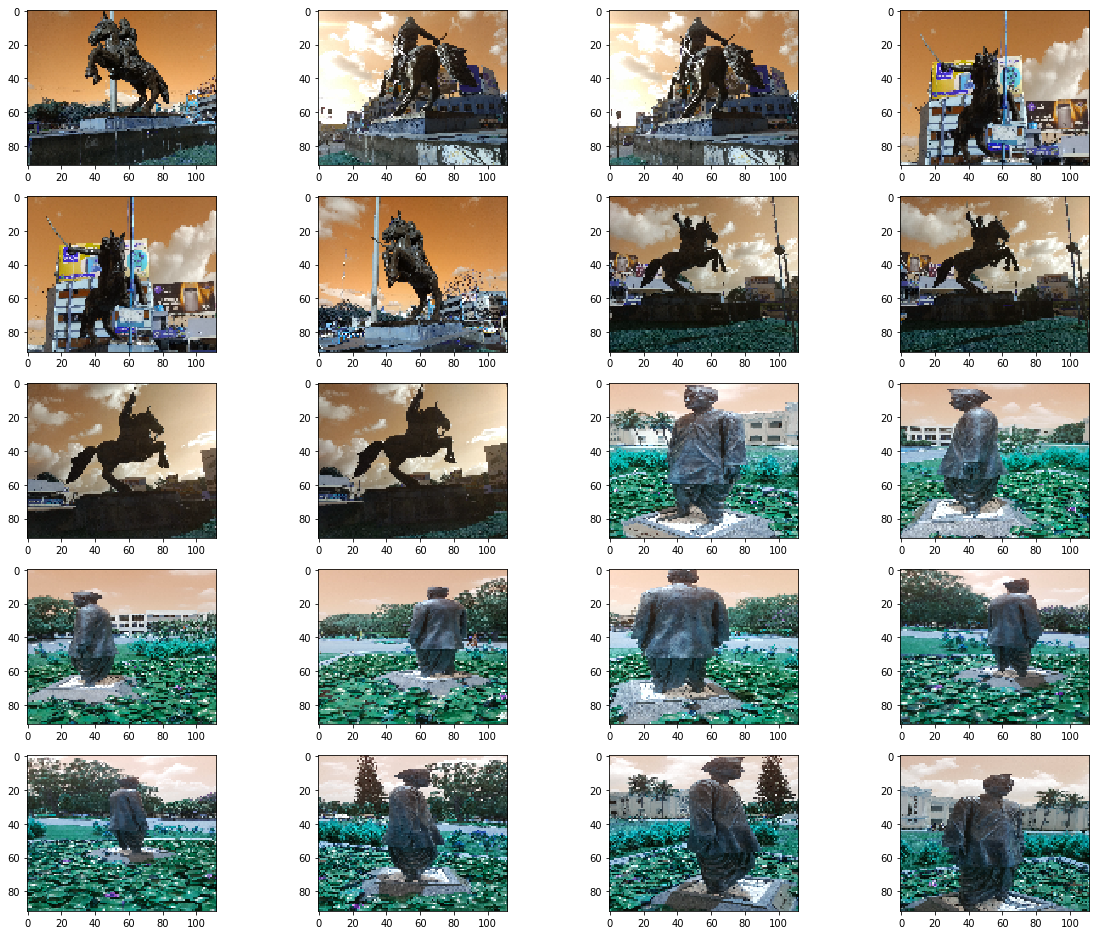

(20, 92, 112, 3)


In [1]:
import glob
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np




# loading positive images and labels


images1=[]    # To store list of images

label=[]      # To Store Labels

files=glob.glob("C:/Users/VISH/Desktop/ml testing/train1/*.jpg")  # reads all the file_names from the specified folder into  files[] list 

for file in files:               #for loop for reading images into images1[] list and appends label of the image into label_positive[] list
    image1=cv2.imread(file) 
    resized_image = cv2.resize(image1, (112, 92))
    images1.append(resized_image)      
    label.append([1])

    
#plt.imshow(images1[1])       #displaying the first image of the list images1[]
#plt.show()



#-------------------------------------loading of positive images is done ----------------------------------------------------


#-------------------------------------loading  negative images and labels----------------------------------------------------

files=glob.glob("C:/Users/VISH/Desktop/ml testing/train2/*.jpg")  #reads all the file_names in the specified folder into  files[] list 

#print files     # prints all file names in the folder
#print len(files)   # prints number of files have been red

for file in files:               #for loop for reading images into images1[] list and appends label of the image into label_positive[] list
    image1=cv2.imread(file) 
    resized_image = cv2.resize(image1, (112, 92))
    images1.append(resized_image)      
    label.append([0])

    
#plt.imshow(images1[16])       #displaying the first image of the list images1[]
#plt.show()

print ("labels",label)


#-------------------------------------loading of Negative images is done ----------------------------------------------------


images2=np.array(images1)

plt.figure(figsize=(20,20))
columns = 4
for i in range(20):
    plt.subplot(20 / columns + 1, columns, i + 1)
    plt.imshow(images2[i,:,:,:])
plt.show()   




#images2=np.array(images1)
labels=np.array(label)
print (images2.shape)


In [2]:
x = tf.placeholder(tf.float32,shape=(None,images2.shape[1],images2.shape[2],images2.shape[3]))   # Tenssorflow container to hold input data 
y = tf.placeholder(tf.float32, shape=[None,labels.shape[1]])         # Tensorflow container to hold  target data 


#------------------------------------------First Convolution Layer-----------------------------------------------------

W=tf.Variable(tf.random_normal([5, 5, 3, 32]))       # using 32 filters of 5x5 each having dimension 3    
b=tf.Variable(tf.random_normal([32]))                # 1x32 bais values  

x2 = tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')
x2 = tf.nn.bias_add(x2, b)
conv_output=tf.nn.relu(x2)
maxpool_output=tf.nn.max_pool(conv_output,ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')  # New image 56x46 


#------------------------------------------Second Convolution Layer----------------------------------------------------

W1=tf.Variable(tf.random_normal([3, 3, 32, 64]))  # using 64 filters of 3x3 each having dimension of 32  
b1=tf.Variable(tf.random_normal([64]))            # 64 bais values

x3 = tf.nn.conv2d(maxpool_output, W1, strides=[1, 1, 1, 1], padding='SAME')
x3 = tf.nn.bias_add(x3, b1)
conv_output2=tf.nn.relu(x3)
maxpool_output2=tf.nn.max_pool(conv_output2,ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')


#-------------------------------------------Third Convolution Layer---------------------------------------------------

W2=tf.Variable(tf.random_normal([3, 3, 64,16]))  # using 16 filters of 3x3 each having dimension of 16 
b2=tf.Variable(tf.random_normal([16]))

x4 = tf.nn.conv2d(maxpool_output2, W2, strides=[1, 1, 1, 1], padding='SAME')
x4 = tf.nn.bias_add(x4, b2)
conv_output3=tf.nn.relu(x4)
maxpool_output3=tf.nn.max_pool(conv_output3,ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')




#-------------------------------------------Fully Connected Network---------------------------------------------------


fc_weights1=tf.Variable(tf.truncated_normal([14*12*16, 1024],stddev=0.05))  #   14*12*16 input features 
fc_bias1=tf.Variable(tf.random_normal([1024]))               # 1024 bias   

fc_weights2=tf.Variable(tf.random_normal([1024, 2048]))      # Hidden Layer accept 1024 
fc_bias2=tf.Variable(tf.random_normal([2048]))               #2048 bias

fc_weights3=tf.Variable(tf.random_normal([2048, 128]))       
fc_bias3=tf.Variable(tf.random_normal([128]))

fc_weights5=tf.Variable(tf.random_normal([128, 8]))
fc_bias5=tf.Variable(tf.random_normal([8]))

fc_weights4=tf.Variable(tf.random_normal([8,1]))
fc_bias4=tf.Variable(tf.random_normal([1]))

fc1 = tf.reshape(maxpool_output3, [-1, fc_weights1.get_shape().as_list()[0]])
fc1 = tf.add(tf.matmul(fc1, fc_weights1), fc_bias1)
fc1 = tf.nn.sigmoid(fc1)


fcl2 = tf.add(tf.matmul(fc1, fc_weights2), fc_bias2)
fcl2=tf.nn.sigmoid(fcl2)


fcl3 = tf.add(tf.matmul(fcl2, fc_weights3), fc_bias3)
fcl3=tf.nn.sigmoid(fcl3)

fcl4 = tf.add(tf.matmul(fcl3, fc_weights5), fc_bias5)
fcl4=tf.nn.sigmoid(fcl4)


# Output, class prediction
out = tf.add(tf.matmul(fcl4, fc_weights4), fc_bias4)
out1=tf.nn.sigmoid(out)

#out1=tf.nn.dropout(out1,0.75)

cost = tf.reduce_mean(( (labels * tf.log(out1)) + ((1 - labels) * tf.log(1.0 - out1)) ) * -1)
#cost=tf.reduce_mean(tf.squared_difference(out1,labels))
#cost=tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.cast(labels,tf.float32),logits=out1))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cost)           



with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
   
    for i in range(500):
        res,_=sess.run([cost,train_step],feed_dict={x:images2,y:labels})
        #if i%100 == 0:
        print ("*",res,"*",i)
    print ("Validating training dataset")
    res=sess.run([out1],feed_dict={x:images2})
    print (np.round(res))
    conv1_output=sess.run([conv_output],feed_dict={x:images2})
    conv2_output=sess.run([conv_output2],feed_dict={x:images2})
    conv3_output=sess.run([conv_output3],feed_dict={x:images2})
    conv1_weights=sess.run([W])
    conv2_weights=sess.run([W1])
    conv3_weights=sess.run([W2])
   

* 1.78412 * 0
* 1.62215 * 1
* 1.48858 * 2
* 1.3649 * 3
* 1.24314 * 4
* 1.14283 * 5
* 1.05739 * 6
* 0.981035 * 7
* 0.917122 * 8
* 0.861571 * 9
* 0.812885 * 10
* 0.770575 * 11
* 0.733905 * 12
* 0.70195 * 13
* 0.673608 * 14
* 0.647866 * 15
* 0.624501 * 16
* 0.603669 * 17
* 0.585224 * 18
* 0.568811 * 19
* 0.554017 * 20
* 0.540363 * 21
* 0.527663 * 22
* 0.516683 * 23
* 0.507429 * 24
* 0.499213 * 25
* 0.491716 * 26
* 0.484797 * 27
* 0.478334 * 28
* 0.472226 * 29
* 0.46643 * 30
* 0.460894 * 31
* 0.455478 * 32
* 0.449861 * 33
* 0.443321 * 34
* 0.435178 * 35
* 0.428013 * 36
* 0.421724 * 37
* 0.41649 * 38
* 0.412715 * 39
* 0.409524 * 40
* 0.406677 * 41
* 0.404061 * 42
* 0.4016 * 43
* 0.399235 * 44
* 0.396927 * 45
* 0.394638 * 46
* 0.392328 * 47
* 0.38994 * 48
* 0.387382 * 49
* 0.384501 * 50
* 0.381187 * 51
* 0.377729 * 52
* 0.374588 * 53
* 0.371701 * 54
* 0.368905 * 55
* 0.36613 * 56
* 0.363357 * 57
* 0.360579 * 58
* 0.357787 * 59
* 0.35497 * 60
* 0.35212 * 61
* 0.349243 * 62
* 0.346353 * 63
* 0

* 0.0312878 * 475
* 0.0312188 * 476
* 0.03115 * 477
* 0.0310816 * 478
* 0.0310133 * 479
* 0.0309454 * 480
* 0.0308777 * 481
* 0.0308104 * 482
* 0.0307432 * 483
* 0.0306764 * 484
* 0.0306099 * 485
* 0.0305436 * 486
* 0.0304775 * 487
* 0.0304118 * 488
* 0.0303463 * 489
* 0.030281 * 490
* 0.030216 * 491
* 0.0301513 * 492
* 0.0300869 * 493
* 0.0300227 * 494
* 0.0299588 * 495
* 0.0298951 * 496
* 0.0298317 * 497
* 0.0297685 * 498
* 0.0297056 * 499
Validating training dataset
[[[ 1.]
  [ 1.]
  [ 1.]
  [ 1.]
  [ 1.]
  [ 1.]
  [ 1.]
  [ 1.]
  [ 1.]
  [ 1.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]]]
